In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pgscen.engine import GeminiEngine
from pgscen.utils.data_utils import split_actuals_hist_future, split_forecasts_hist_future
from pathlib import Path
from pgscen.pca_model import PCAGeminiEngine, PCAGeminiModel

In [2]:
!ls ../data/MetaData

Texas_State_Boundary-shp.zip solar_meta.xlsx
load_meta.xlsx               wind_meta.xlsx


In [15]:
def load_solar_data(data_path):
    solar_site_actual_df = pd.read_csv(
        Path(data_path, 'Solar', 'NREL', 'Actual',
             'solar_actual_1h_site_2017_2018_utc.csv'),
        parse_dates=['Time'], index_col='Time'
        )

    solar_site_forecast_df = pd.read_csv(
        Path(data_path, 'Solar', 'NREL', 'Day-ahead',
             'solar_day_ahead_forecast_site_2017_2018_utc.csv'),
        parse_dates=['Issue_time', 'Forecast_time']
        )

    solar_meta_df = pd.read_excel(
        Path(data_path, 'MetaData', 'solar_meta.xlsx'))

    return solar_site_actual_df, solar_site_forecast_df, solar_meta_df

In [16]:
scen_start_time = pd.to_datetime('2018-07-01 06:00:00',utc=True)
nscen = 1000

In [17]:
solar_site_actual_df, solar_site_forecast_df, solar_meta_df = load_solar_data('../data/')

In [18]:
scen_timesteps = pd.date_range(start=scen_start_time,periods=24, freq='H')

(solar_site_actual_hists,
            solar_site_actual_futures) = split_actuals_hist_future(
                    solar_site_actual_df, scen_timesteps)

(solar_site_forecast_hists,
            solar_site_forecast_futures) = split_forecasts_hist_future(
                    solar_site_forecast_df, scen_timesteps)

In [21]:
pge = PCAGeminiEngine(solar_site_actual_hists, solar_site_forecast_hists, scen_start_time, solar_meta_df)
dist = pge.asset_distance().values
pge.fit(10, dist / (10 * dist.max()), 5e-2)
# pge.fit(10,1e-2,1e-2)

(122718, 10)


In [22]:
pge.create_scenario(1000, solar_site_forecast_futures)

In [23]:
pge.model.scen_df.round(2)

Adamstown Solar                            \
    2018-07-01 06:00:00+00:00 2018-07-01 07:00:00+00:00   
0                         0.0                       0.0   
1                         0.0                       0.0   
2                         0.0                       0.0   
3                         0.0                       0.0   
4                         0.0                       0.0   
..                        ...                       ...   
995                       0.0                       0.0   
996                       0.0                       0.0   
997                       0.0                       0.0   
998                       0.0                       0.0   
999                       0.0                       0.0   

                                                         \
    2018-07-01 08:00:00+00:00 2018-07-01 09:00:00+00:00   
0                         0.0                       0.0   
1                         0.0                       0.0   
2                         0.0                       0.0   
3                         0.0                       0.0   
4                         0.0                       0.0   
..                        ...                       ...   
995                       0.0                       0.0   
996                       0.0                       0.0   
997                       0.0                       0.0   
998                       0.0                       0.0   
999                       0.0                       0.0   

                                                         \
    2018-07-01 10:00:00+00:00 2018-07-01 11:00:00+00:00   
0                         0.0                      1.31   
1                         0.0                      1.47   
2                         0.0                      1.32   
3                         0.0                      1.25   
4                         0.0                      1.52   
..                        ...                       ...   
995                       0.0                      1.56   
996                       0.0                      1.49   
997                       0.0                      1.38   
998                       0.0                      1.45   
999                       0.0                      1.21   

                                                         \
    2018-07-01 12:00:00+00:00 2018-07-01 13:00:00+00:00   
0                       72.13                    195.23   
1                       67.53                    162.00   
2                       74.52                    200.28   
3                       73.32                    187.92   
4                       68.55                    173.08   
..                        ...                       ...   
995                     61.85                    135.41   
996                     76.70                    204.75   
997                     69.10                    170.24   
998                     63.17                    161.20   
999                     60.67                    137.64   

                                                         ...  \
    2018-07-01 14:00:00+00:00 2018-07-01 15:00:00+00:00  ...   
0                      234.34                    207.48  ...   
1                      171.58                    211.95  ...   
2                      231.43                    259.13  ...   
3                      185.83                    200.20  ...   
4                      238.49                    277.33  ...   
..                        ...                       ...  ...   
995                    180.90                    181.52  ...   
996                    237.56                    235.71  ...   
997                    186.63                    172.73  ...   
998                    256.03                    238.70  ...   
999                    171.54                    200.74  ...   

                     solar530                            \
    2018-07-01 20:00:00+00:00 2018-07-01 21:00:00+

In [26]:
pge.model.asset_cov.to_csv('/Users/xy3134/Research/PERFORM/notebooks/NREL/solar_pca/data/asset_cov.csv',index=False)

In [12]:
save_dir = '/Users/xy3134/Research/PERFORM/Data/Outputs/PGscen/PCA'

pge.write_to_csv(save_dir,solar_site_actual_futures,write_forecasts=True)

In [13]:
datadir = '/Users/xy3134/Research/PERFORM/Data/Outputs/PGscen/PCA/20180701/solar/'
pd.read_csv(datadir+'solar530.csv')

,Type,Index,0600,0700,0800,0900,1000,1100,1200,1300,...,2000,2100,2200,2300,0000,0100,0200,0300,0400,0500
0,Actual,1,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.620937,24.730875,45.682650,...,85.474350,82.825275,72.988500,54.213412,21.470475,0.991088,0.000000,0.0,0.0,0.0
1,Forecast,1,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,19.913284,48.531139,...,79.330580,77.268859,72.086220,55.468206,25.150411,0.000000,0.000000,0.0,0.0,0.0
2,Simulation,1,0.0,0.000000e+00,0.000000e+00,9.848919e-16,2.386880e-15,0.905954,23.989212,50.364719,...,92.435050,92.287414,71.677555,62.168410,29.383665,0.842671,0.000001,0.0,0.0,0.0
3,Simulation,2,0.0,0.000000e+00,0.000000e+00,5.006213e-17,0.000000e+00,0.835625,24.318193,61.928368,...,100.635638,88.982033,93.943679,71.412974,28.416091,0.329723,0.000000,0.0,0.0,0.0
4,Simulation,3,0.0,2.388296e-15,1.640352e-15,0.000000e+00,0.000000e+00,0.758569,22.040193,51.520381,...,79.996906,78.543226,86.339918,57.723488,21.747498,0.000000,0.000000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
997,Simulation,996,0.0,4.197702e-15,0.000000e+00,0.000000e+00,0.000000e+00,0.707956,23.388433,62.496222,...,80.753455,69.533649,90.807648,71.424824,27.821376,0.000000,0.000000,0.0,0.0,0.0
998,Simulation,997,0.0,6.277495e-16,0.000000e+00,1.187872e-15,0.000000e+00,0.796718,20.804070,43.916955,...,79.245059,75.867968,82.685282,75.785483,32.888848,1.272341,0.000015,0.0,0.0,0.0
999,Simulation,998,0.0,1.477473e-15,0.000000e+00,0.000000e+00,2.548069e-16,0.873555,20.982007,38.471223,...,102.670267,110.604577,107.102348,81.408516,32.146966,1.324446,0.000011,0.0,0.0,0.0
1000,Simulation,999,0.0,4.923935e-15,0.000000e+00,3.133016e-15,0.000000e+00,0.843252,22.071884,46.039309,...,95.816010,83.127479,92.913933,94.425668,40.719545,2.304198,0.000023,0.0,0.0,0.0


In [9]:
pge.model.fit(1e-2, 1e-2)

In [10]:
# pge.model.asset_cov
pge.model.horizon_cov

,lag_0,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,lag_8,lag_9
lag_0,4.781730,0.080517,0.143201,0.031630,-0.008244,0.000933,0.000181,-0.073508,-0.026702,-0.002241
lag_1,0.080517,4.781730,0.006409,0.053945,0.001227,0.035159,-0.000329,0.052548,-0.001340,-0.026547
lag_2,0.143201,0.006409,4.781730,0.048499,0.000381,0.009883,0.000212,-0.005689,-0.022265,-0.000050
lag_3,0.031630,0.053945,0.048499,4.781730,0.046635,0.001004,-0.016732,-0.000054,0.004132,-0.001277
lag_4,-0.008244,0.001227,0.000381,0.046635,4.781730,0.065272,-0.000723,-0.002010,-0.006011,-0.065526
lag_5,0.000933,0.035159,0.009883,0.001004,0.065272,4.781730,0.037055,-0.031529,0.000003,-0.001336
lag_6,0.000181,-0.000329,0.000212,-0.016732,-0.000723,0.037055,4.781730,0.006499,-0.066909,0.084417
lag_7,-0.073508,0.052548,-0.005689,-0.000054,-0.002010,-0.031529,0.006499,4.781730,-0.098480,0.134780
lag_8,-0.026702,-0.001340,-0.022265,0.004132,-0.006011,0.000003,-0.066909,-0.098480,4.781730,-0.035852
lag_9,-0.002241,-0.026547,-0.000050,-0.001277,-0.065526,-0.001336,0.084417,0.134780,-0.035852,4.781730


In [11]:
md = pge.model

In [12]:
nscen = 1000
md.get_forecast(solar_site_forecast_futures)
md.generate_gauss_pca_scenarios(nscen)

(array([  1.,   1.,   1.,   2.,   7.,  22.,   9.,  17.,  41.,  52.,  50.,
         61.,  79.,  91.,  96.,  98., 115.,  73.,  61.,  46.,  24.,  15.,
         18.,   8.,   6.,   2.,   2.,   1.,   0.,   1.]),
 array([ 40.12      ,  50.65633333,  61.19266667,  71.729     ,
         82.26533333,  92.80166667, 103.338     , 113.87433333,
        124.41066667, 134.947     , 145.48333333, 156.01966667,
        166.556     , 177.09233333, 187.62866667, 198.165     ,
        208.70133333, 219.23766667, 229.774     , 240.31033333,
        250.84666667, 261.383     , 271.91933333, 282.45566667,
        292.992     , 303.52833333, 314.06466667, 324.601     ,
        335.13733333, 345.67366667, 356.21      ]),
 <BarContainer object of 30 artists>)

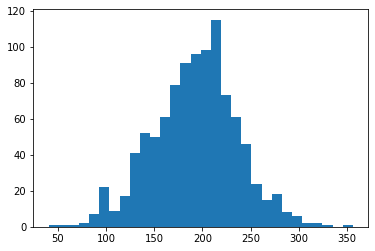

In [19]:
plt.hist(md.scen_df.round(2).values[:,8],bins=30)

In [17]:
scen_df = pd.DataFrame()

for asset in md.asset_list:
    pca_cols = [(asset,t) for t in md.pca_scen_timesteps]
#     cols = 
    md.pca.inverse_transform(md.scen_pca_df[pca_cols].values)

In [20]:
arr = md.pca.inverse_transform(md.scen_pca_df[pca_cols].values)

In [31]:
(arr+md.hist_dev_mean_dict['Adamstown Solar']['mean'])[0,:]

array([ 0.00000000e+00,  9.80715840e-15, -9.25440538e-15,  1.34604046e-15,
       -2.51043771e-15,  1.14198556e+00,  9.32325365e-02, -1.81385021e+01,
       -5.05843478e+01, -3.94014798e+01, -1.77422616e+01, -2.53855886e+00,
       -2.66125168e+00,  8.49720576e+00,  1.53284792e+01, -2.58880470e+01,
       -1.41709837e+01,  3.94262628e+00,  8.88182735e-01,  9.99488697e-01,
       -1.76125753e-05,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00])

In [26]:
md.hist_dev_mean_dict['Adamstown Solar']['mean']

array([  0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   1.35215239,   3.48677633,  -2.89228663,
       -14.95667339,  -5.81410183,  -9.16509249,  -6.8754147 ,
        -4.20829215,  -2.6344936 ,  -0.44313996,  -7.10754692,
         0.8286644 ,  11.87966047,   3.87605284,   1.95379642,
         0.        ,   0.        ,   0.        ,   0.        ])

In [32]:
arr[0,:]

array([ 0.00000000e+00,  9.80715840e-15, -9.25440538e-15,  1.34604046e-15,
       -2.51043771e-15, -2.10166837e-01, -3.39354379e+00, -1.52462155e+01,
       -3.56276744e+01, -3.35873780e+01, -8.57716915e+00,  4.33685584e+00,
        1.54704046e+00,  1.11316994e+01,  1.57716192e+01, -1.87805001e+01,
       -1.49996481e+01, -7.93703419e+00, -2.98787010e+00, -9.54307727e-01,
       -1.76125753e-05,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00])